In [3]:
! pip install lifelines

    100% |████████████████████████████████| 215kB 1.7MB/s ta 0:00:01


In [4]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

print(df.head())
"""
    T  E    group
0   6  1  miR-137
1  13  1  miR-137
2  13  1  miR-137
3  13  1  miR-137
4  19  1  miR-137
"""

T = df['T']
E = df['E']

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [7]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

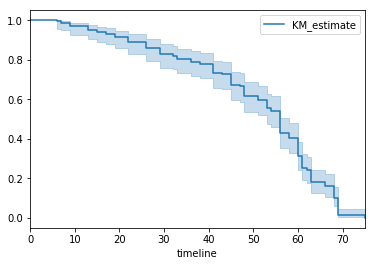

In [10]:
kmf.survival_function_
kmf.median_
kmf.plot()

In [11]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.print_summary()  # access the results using cph.summary

"""
n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95
fin  -0.3790     0.6845    0.1914 -1.9806 0.0476     -0.7542     -0.0039   *
age  -0.0572     0.9444    0.0220 -2.6042 0.0092     -0.1003     -0.0142  **
race  0.3141     1.3691    0.3080  1.0198 0.3078     -0.2897      0.9180
wexp -0.1511     0.8597    0.2121 -0.7124 0.4762     -0.5670      0.2647
mar  -0.4328     0.6487    0.3818 -1.1335 0.2570     -1.1813      0.3157
paro -0.0850     0.9185    0.1957 -0.4341 0.6642     -0.4687      0.2988
prio  0.0911     1.0954    0.0286  3.1824 0.0015      0.0350      0.1472  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Concordance = 0.640
"""

n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    0.2122 -0.7058 0.4803     -0.5657      0.2662    
mar  -0.4337     0.6481    0.3819 -1.1357 0.2561     -1.1821      0.3147    
paro -0.0849     0.9186    0.1958 -0.4336 0.6646     -0.4685      0.2988    
prio  0.0915     1.0958    0.0286  3.1938 0.0014      0.0353      0.1476  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640


"\nn=432, number of events=114\n\n        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95\nfin  -0.3790     0.6845    0.1914 -1.9806 0.0476     -0.7542     -0.0039   *\nage  -0.0572     0.9444    0.0220 -2.6042 0.0092     -0.1003     -0.0142  **\nrace  0.3141     1.3691    0.3080  1.0198 0.3078     -0.2897      0.9180\nwexp -0.1511     0.8597    0.2121 -0.7124 0.4762     -0.5670      0.2647\nmar  -0.4328     0.6487    0.3818 -1.1335 0.2570     -1.1813      0.3157\nparo -0.0850     0.9185    0.1957 -0.4341 0.6642     -0.4687      0.2988\nprio  0.0911     1.0954    0.0286  3.1824 0.0015      0.0350      0.1472  **\n---\nSignif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1\n\nConcordance = 0.640\n"

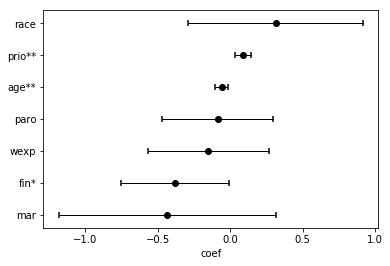

In [12]:
cph.plot()

In [14]:
print(cph.hazards_)

           fin       age    race      wexp       mar      paro      prio
coef -0.379422 -0.057438  0.3139 -0.149796 -0.433704 -0.084871  0.091497


In [17]:
cph.predict_partial_hazard(rossi_dataset.drop(["week", "arrest"], axis=1))

,0
0,1.219127
1,3.230250
2,3.031059
3,0.487712
4,1.214024
5,1.238655
6,0.579853
7,1.110755
8,2.327246
9,1.297945


In [20]:
from lifelines.datasets import load_waltons
df = load_rossi() # returns a Pandas DataFrame

print(df.head())

T = df['week']
E = df['arrest']

   week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3
1    17       1    0   18     1     0    0     1     8
2    25       1    0   19     0     1    0     1    13
3    52       0    1   23     1     1    1     1     1
4    52       0    0   19     0     1    0     1     3


In [21]:
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 432 observations, 318 censored>

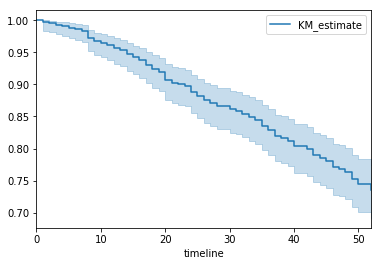

In [22]:
kmf.survival_function_
kmf.median_
kmf.plot()